### Download Necessary Files

In [16]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Excercise 7.1

#### Scatter plot of birth weight versus mother’s age

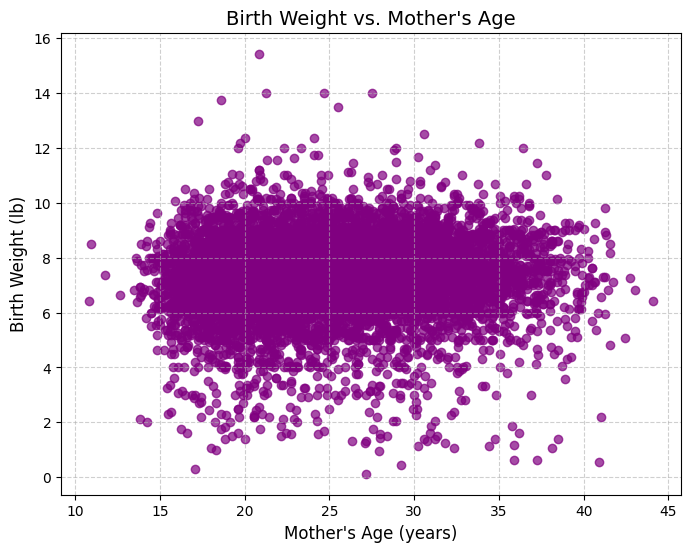

In [18]:
import nsfg
import matplotlib.pyplot as plt

#Read data
df = nsfg.ReadFemPreg()
#Select only sucessful delivery
live = df[df.outcome == 1]
#Remove NULL
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
#Assinging age and weight
mothers_age=live.agepreg
birth_weight = live.totalwgt_lb

#Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(mothers_age, birth_weight, color='purple', alpha=0.7)
plt.title("Birth Weight vs. Mother's Age", fontsize=14)
plt.xlabel("Mother's Age (years)", fontsize=12)
plt.ylabel("Birth Weight (lb)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Bin plot of birth weight versus mother’s age

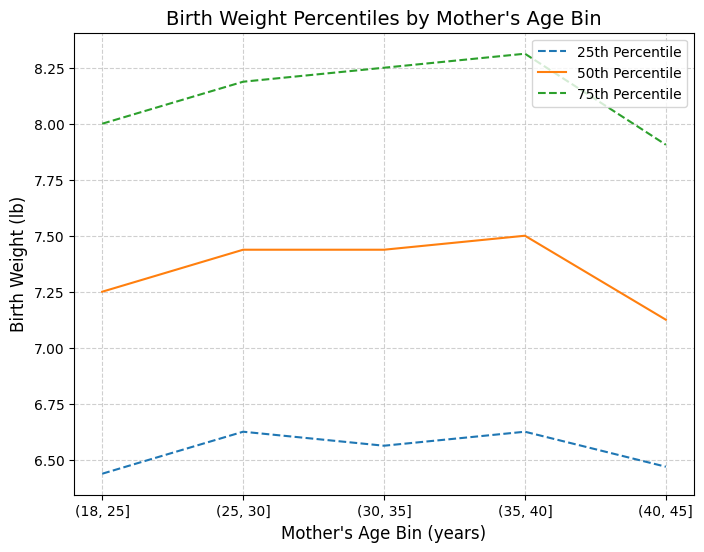

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define age bins and bin the data
bins = [18, 25, 30, 35, 40, 45]  # Define age bins
live['Age_Bin'] = pd.cut(live['agepreg'], bins)

# Calculate percentiles for each bin
percentiles = live.groupby('Age_Bin')['totalwgt_lb'].quantile([0.25, 0.5, 0.75]).unstack()

# Plot the percentiles
plt.figure(figsize=(8, 6))
for perc, style in zip([0.25, 0.5, 0.75], ['--', '-', '--']):
    plt.plot(percentiles.index.astype(str), percentiles[perc], label=f'{int(perc*100)}th Percentile', linestyle=style)

plt.title("Birth Weight Percentiles by Mother's Age Bin", fontsize=14)
plt.xlabel("Mother's Age Bin (years)", fontsize=12)
plt.ylabel("Birth Weight (lb)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Key Observations:
* Birth weights generally increase with the mother's age up to the 35–40 age group and then decline slightly in the 40–45 range.
* The spread between the 25th and 75th percentiles (interquartile range) remains consistent across most age groups, reflecting similar variability in birth weights.
* The highest median birth weight is seen in the 35–40 age bin, suggesting optimal health outcomes in this range.

### Excercise 8.1

#### Biased Experiments simulation

In [1]:
import numpy as np
import pandas as pd

# Parameters for the simulation
true_mu = 10
true_sigma = 2
sample_size = 30
num_simulations = 10000

# Arrays to store results
means = []
medians = []
s2_biased = []
s2_unbiased = []

# Simulate data and calculate statistics
for _ in range(num_simulations):
    sample = np.random.normal(loc=true_mu, scale=true_sigma, size=sample_size)
    
    # Mean and median
    sample_mean = np.mean(sample)
    sample_median = np.median(sample)
    
    # Variance (biased and unbiased)
    sample_var_biased = np.var(sample)
    sample_var_unbiased = np.var(sample, ddof=1)
    
    # Append results
    means.append(sample_mean)
    medians.append(sample_median)
    s2_biased.append(sample_var_biased)
    s2_unbiased.append(sample_var_unbiased)

# Convert results to pandas DataFrame
results = pd.DataFrame({
    "Mean": means,
    "Median": medians,
    "S2_Biased": s2_biased,
    "S2_Unbiased": s2_unbiased
})

# Calculate biases
mean_bias = results["Mean"].mean() - true_mu
median_bias = results["Median"].mean() - true_mu

# Calculate MSEs
mse_s2_biased = ((results["S2_Biased"] - true_sigma**2)**2).mean()
mse_s2_unbiased = ((results["S2_Unbiased"] - true_sigma**2)**2).mean()

# Print results
print("Bias of Mean:", mean_bias)
print("Bias of Median:", median_bias)
print("MSE of S2 (Biased):", mse_s2_biased)
print("MSE of S2 (Unbiased):", mse_s2_unbiased)


Bias of Mean: 0.0015930332589064733
Bias of Median: 0.0027731839252993495
MSE of S2 (Biased): 1.0399877982426382
MSE of S2 (Unbiased): 1.0972633202580264


### Excercise 8.2

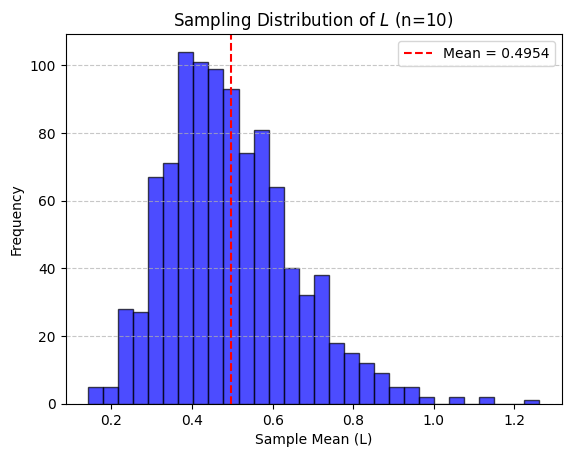

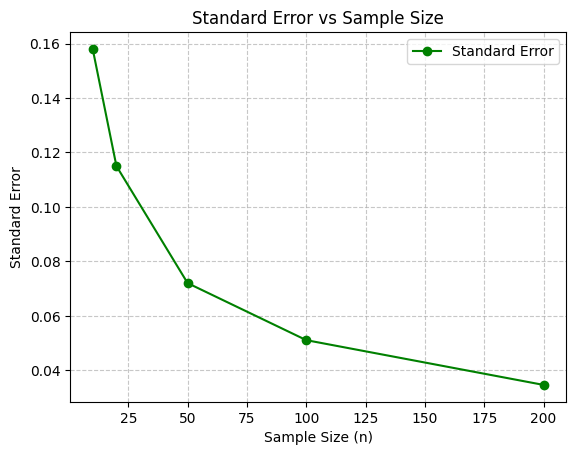

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 2
sample_sizes = [10, 20, 50, 100, 200]
num_simulations = 1000

# Function to simulate and calculate sampling distributions
def simulate_sampling(lambda_param, n, num_simulations):
    samples = np.random.exponential(scale=1/lambda_param, size=(num_simulations, n))
    means = samples.mean(axis=1)
    return means

# Simulate for n = 10 and calculate 90% confidence interval and standard error
n = 10
sample_means = simulate_sampling(lambda_param, n, num_simulations)
mean_of_means = np.mean(sample_means)
std_error = np.std(sample_means, ddof=1)
conf_interval = np.percentile(sample_means, [5, 95])

# Plot the sampling distribution for n = 10
plt.hist(sample_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_of_means, color='red', linestyle='--', label=f'Mean = {mean_of_means:.4f}')
plt.title('Sampling Distribution of $L$ (n=10)')
plt.xlabel('Sample Mean (L)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Simulate for different sample sizes and calculate standard error
standard_errors = []
for n in sample_sizes:
    sample_means = simulate_sampling(lambda_param, n, num_simulations)
    std_error = np.std(sample_means, ddof=1)
    standard_errors.append(std_error)

# Plot standard error vs. sample size
plt.plot(sample_sizes, standard_errors, marker='o', linestyle='-', color='green', label='Standard Error')
plt.title('Standard Error vs Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()